In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras

In [2]:
train = pd.read_csv('train.csv', sep=',')
test = pd.read_csv('test.csv', sep=',')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#번호, 생존여부, 티켓 클래스, 탑승자이름, 성벌, 나이 , 탑승한 형제 자매/배우자 수, 탑승한 부모/자녀의 수, 티켓 번호, 요금, 케빈 번호, 승선지(항구)

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

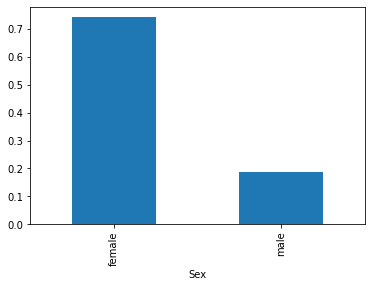

In [6]:
df = train.groupby('Sex').mean()["Survived"]   #생존자의 성별
df.plot(kind='bar')
plt.show()

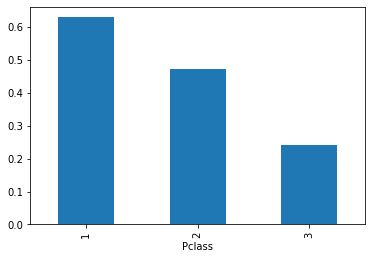

In [7]:
df = train.groupby('Pclass').mean()["Survived"]   #생존자의 티켓 클래스
df.plot(kind='bar')
plt.show()

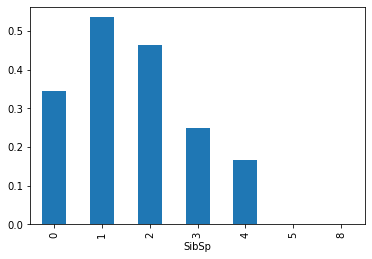

In [9]:
df = train.groupby('SibSp').mean()["Survived"]   #생존자의 탑승한 형제자매/배우자 수
df.plot(kind='bar')
plt.show()

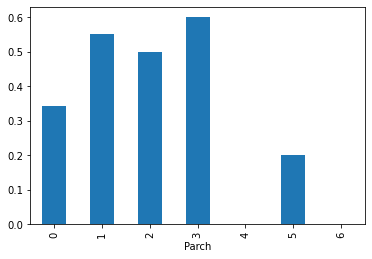

In [11]:
df = train.groupby('Parch').mean()["Survived"]   #생존자의 탑승한 부모/자녀의 수
df.plot(kind='bar')
plt.show()

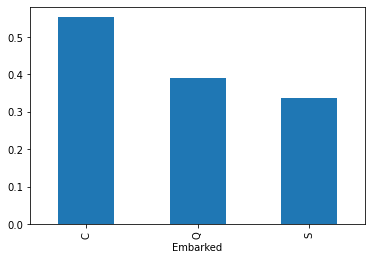

In [12]:
df = train.groupby('Embarked').mean()["Survived"]   #생존자의 승선지
df.plot(kind='bar')
plt.show()

In [13]:
#학습에 필요한 성별, 티켓클래스를 제외한 나머지 칼럼 삭제
train.drop(['SibSp', 'Parch', 'Ticket', 'Embarked','Name','Cabin','PassengerId','Fare','Age'], inplace=True, axis=1)

In [14]:
train.dropna(inplace=True)

In [15]:
train.head()

,Survived,Pclass,Sex
0,0,3,male
1,1,1,female
2,1,3,female
3,1,1,female
4,0,3,male


In [16]:
#데이터 전처리. 문자열인 성별을 정수로 변경
for i in train.index:
    if train.loc[i,'Sex'] == "male":
        train.loc[i,'Sex'] = 1
    else:
        train.loc[i,'Sex'] = 0

In [17]:
train.head()

,Survived,Pclass,Sex
0,0,3,1
1,1,1,0
2,1,3,0
3,1,1,0
4,0,3,1


In [18]:
train.Survived

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [19]:
target = np.ravel(train.Survived) #생존자 1차원배열로 가져오기

In [20]:
train.drop(['Survived'], inplace=True, axis=1)   #생존자 데이터 삭제
train=train.astype(float)

In [21]:
train.head()

,Pclass,Sex
0,3.0,1.0
1,1.0,0.0
2,3.0,0.0
3,1.0,0.0
4,3.0,1.0


In [22]:
model = keras.Sequential()
model.add(keras.layers.Dense(16,activation='relu', input_shape=(2,)))
model.add(keras.layers.Dense(8,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

2022-08-16 12:53:38.895566: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-16 12:53:38.896446: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 10. Tune using inter_op_parallelism_threads for best performance.


In [23]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [24]:
model.fit(train,target, epochs=30, verbose=1)

Train on 891 samples
Epoch 1/30
891/891 [==============================] - 0s 401us/sample - loss: 0.6417 - accuracy: 0.6162
Epoch 2/30
891/891 [==============================] - 0s 41us/sample - loss: 0.6316 - accuracy: 0.6162
Epoch 3/30
891/891 [==============================] - 0s 42us/sample - loss: 0.6165 - accuracy: 0.6162
Epoch 4/30
891/891 [==============================] - 0s 39us/sample - loss: 0.5930 - accuracy: 0.6902
Epoch 5/30
891/891 [==============================] - 0s 40us/sample - loss: 0.5758 - accuracy: 0.7228
Epoch 6/30
891/891 [==============================] - 0s 39us/sample - loss: 0.5589 - accuracy: 0.7969
Epoch 7/30
891/891 [==============================] - 0s 40us/sample - loss: 0.5452 - accuracy: 0.7868
Epoch 8/30
891/891 [==============================] - 0s 39us/sample - loss: 0.5343 - accuracy: 0.7868
Epoch 9/30
891/891 [==============================] - 0s 41us/sample - loss: 0.5243 - accuracy: 0.7868
Epoch 10/30
891/891 [==============================

In [25]:
test.drop(['SibSp', 'Parch', 'Ticket', 'Embarked','Name','Cabin','PassengerId','Fare','Age'], inplace=True, axis=1)
test.dropna(inplace=True)
for i in test.index:
  if test.loc[i, 'Sex']=='male':
    test.loc[i,'Sex']=1
  else:
    test.loc[i,'Sex']=0
test = test.astype(float)

In [26]:
model.predict(test, verbose=1)

418/418 [==============================] - 0s 85us/sample


array([[0.1314184 ],
       [0.58461106],
       [0.20786315],
       [0.1314184 ],
       [0.58461106],
       [0.1314184 ],
       [0.58461106],
       [0.20786315],
       [0.58461106],
       [0.1314184 ],
       [0.1314184 ],
       [0.31691065],
       [0.92394763],
       [0.20786315],
       [0.92394763],
       [0.80584395],
       [0.20786315],
       [0.1314184 ],
       [0.58461106],
       [0.58461106],
       [0.31691065],
       [0.1314184 ],
       [0.92394763],
       [0.31691065],
       [0.92394763],
       [0.1314184 ],
       [0.92394763],
       [0.1314184 ],
       [0.31691065],
       [0.1314184 ],
       [0.20786315],
       [0.20786315],
       [0.58461106],
       [0.58461106],
       [0.31691065],
       [0.1314184 ],
       [0.58461106],
       [0.58461106],
       [0.1314184 ],
       [0.1314184 ],
       [0.1314184 ],
       [0.31691065],
       [0.1314184 ],
       [0.80584395],
       [0.92394763],
       [0.1314184 ],
       [0.31691065],
       [0.131